## What is the most optimal skill to learn for Data Analysts?
#### Approach:
##### 1. Confirm median salary and group skills to determine likelihood of inclusion in job postings
##### 2. Visualize median salary of job postings against percentage of skills demanded
##### 3. Determine if certain technologies are more prevalent in the job market's demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Schuck\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# We just need the DA roles in the US, so first step is to filter by this designation.
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [6]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [7]:
from adjustText import adjust_text

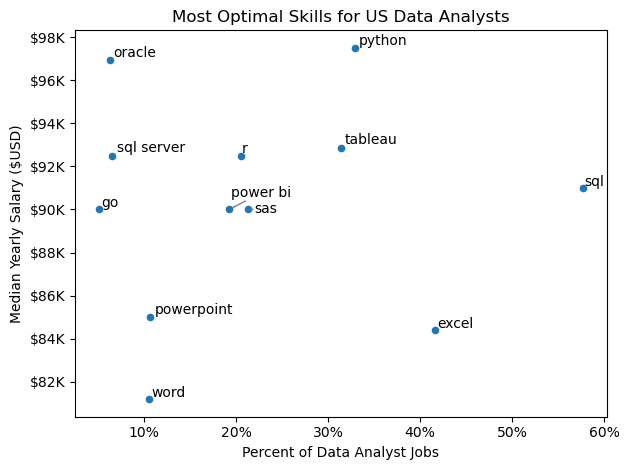

In [8]:
# Let's take a look at a visualization of the data frame
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt)) # unnecessary in this plot, as the values and titles are close together

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for US Data Analysts')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

## Group Optimal Skills by Technology Type

##### Luke's code to color-code the scatter plot's values

In [9]:
# Getting an idea of the categories to use in grouping the plot's values
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [10]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all the dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key alrady exists in technology.dict, add value to existing value
            technology_dict[key] += value
        else:                      # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set, then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['msaccess',
  'dax',
  'ms access',
  'spreadsheet',
  'nuix',
  'esquisse',
  'alteryx',
  'microstrategy',
  'sap',
  'sharepoint',
  'visio',
  'cognos',
  'looker',
  'sheets',
  'sas',
  'word',
  'splunk',
  'spss',
  'datarobot',
  'ssrs',
  'tableau',
  'power bi',
  'outlook',
  'powerbi',
  'powerpoint',
  'ssis',
  'qlik',
  'excel'],
 'programming': ['ruby',
  'visualbasic',
  'sass',
  'mongo',
  'elixir',
  'delphi',
  'ocaml',
  'scala',
  'sql',
  'typescript',
  'swift',
  'no-sql',
  'clojure',
  'erlang',
  'crystal',
  'c#',
  'fortran',
  'php',
  'solidity',
  'groovy',
  'haskell',
  'python',
  'apl',
  'javascript',
  'objective-c',
  'c++',
  'f#',
  'sas',
  't-sql',
  'golang',
  'bash',
  'lisp',
  'cobol',
  'dart',
  'c',
  'matlab',
  'r',
  'visual basic',
  'java',
  'julia',
  'vb.net',
  'kotlin',
  'assembly',
  'shell',
  'pascal',
  'lua',
  'perl',
  'rust',
  'html',
  'css',
  'mongodb',
  'nosql',
  'go',
  'powershell',
  '

In [11]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,msaccess
0,analyst_tools,dax
0,analyst_tools,ms access
0,analyst_tools,spreadsheet
0,analyst_tools,nuix
...,...,...
9,sync,symphony
9,sync,webex
9,sync,slack
9,sync,microsoft teams


In [12]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

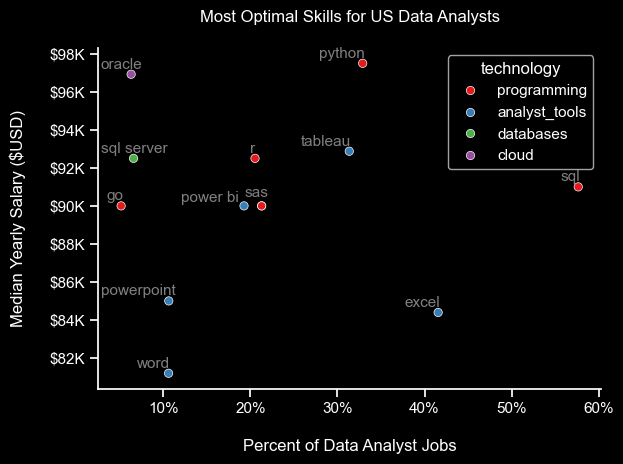

In [54]:
# Create the scatter plot, setting initial background formatting
plt.style.use('dark_background') # black background plot format
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    palette='Set1'
)

# Remove top and right spines
sns.despine()

# Set the Seaborn theme style
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    # Add the text labels to the plot at the corresponding positions
    texts.append(plt.text(
        df_DA_skills_high_demand['skill_percent'].iloc[i],
        df_DA_skills_high_demand['median_salary'].iloc[i],
        txt,
        fontsize=11,  # Adjust the font size if necessary
        color='grey', # Label color to contrast background
        ha='right',
        va='bottom'
    ))

# Adjust text labels to avoid overlap, with arrows pointing to the labels
adjust_text(
    texts,
    # arrowprops=dict(arrowstyle='->', color='black', lw=1),  # Adjust arrow style
    only_move={'points': 'x', 'text': 'xy'},  # Prevent excessive text movement
)

# Set the labels and title
plt.xlabel('\nPercent of Data Analyst Jobs') # inclusion of spacer ('\n') to separate axis label
plt.ylabel('Median Yearly Salary ($USD)\n') # inclusion of spacer ('\n') to separate axis label
plt.title('Most Optimal Skills for US Data Analysts\n') # inclusion of spacer ('\n') to separate title

# Format the y-axis labels (show salaries in thousands)
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Format the x-axis as percentage
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Use tight_layout to prevent clipping of labels and titles
plt.tight_layout()

# Show the plot
plt.show()